# 这个文件分析火灾与火山爆发与温度的关系

In [5]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

- 以Latitude, Longitude, bright_t31(火灾的一个指标), type(火灾类型: 0假设植被, 1活火山, 2静态陆源, 3近海探测)为X, 温度为y
- 将type进行dummy编码, 并dropfirst(把第一个取0否则会多重共线性), 把纬度做绝对值处理, 表示距离赤道的距离
- R2为0.582不过我们可以用F-statistic说明, F的pvalue是0.00说明模型肯定有解释意义
- 接下来可以解释一下表格里的coef和p-value啥的, 比如随着纬度绝对值增加温度降低, 火山爆发导致温度比假设植被着火高(根据coef=11.3193判断)

In [6]:
df = pd.read_csv('../data/temperature_forestfire.csv')
X = df[['Latitude', 'Longitude', 'bright_t31', 'type']].copy()
X['Latitude'] = X['Latitude'].abs()
X = pd.get_dummies(X, columns=['type'], drop_first=True)
X.insert(0, 'one', 1)
X.rename(columns={'type_1': 'Active Avlcano', 'type_2': 'Static Terrestrial', 'type_3': 'Offshore Detection'}, inplace=True)
y = df['AverageTemperature']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     AverageTemperature   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     2129.
Date:                Sun, 27 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:08:59   Log-Likelihood:                -29348.
No. Observations:                9172   AIC:                         5.871e+04
Df Residuals:                    9165   BIC:                         5.876e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
one                 -158.9027      2

画出了四张关于温度与火焰明亮度关系的图, 证明温度与火灾正相关

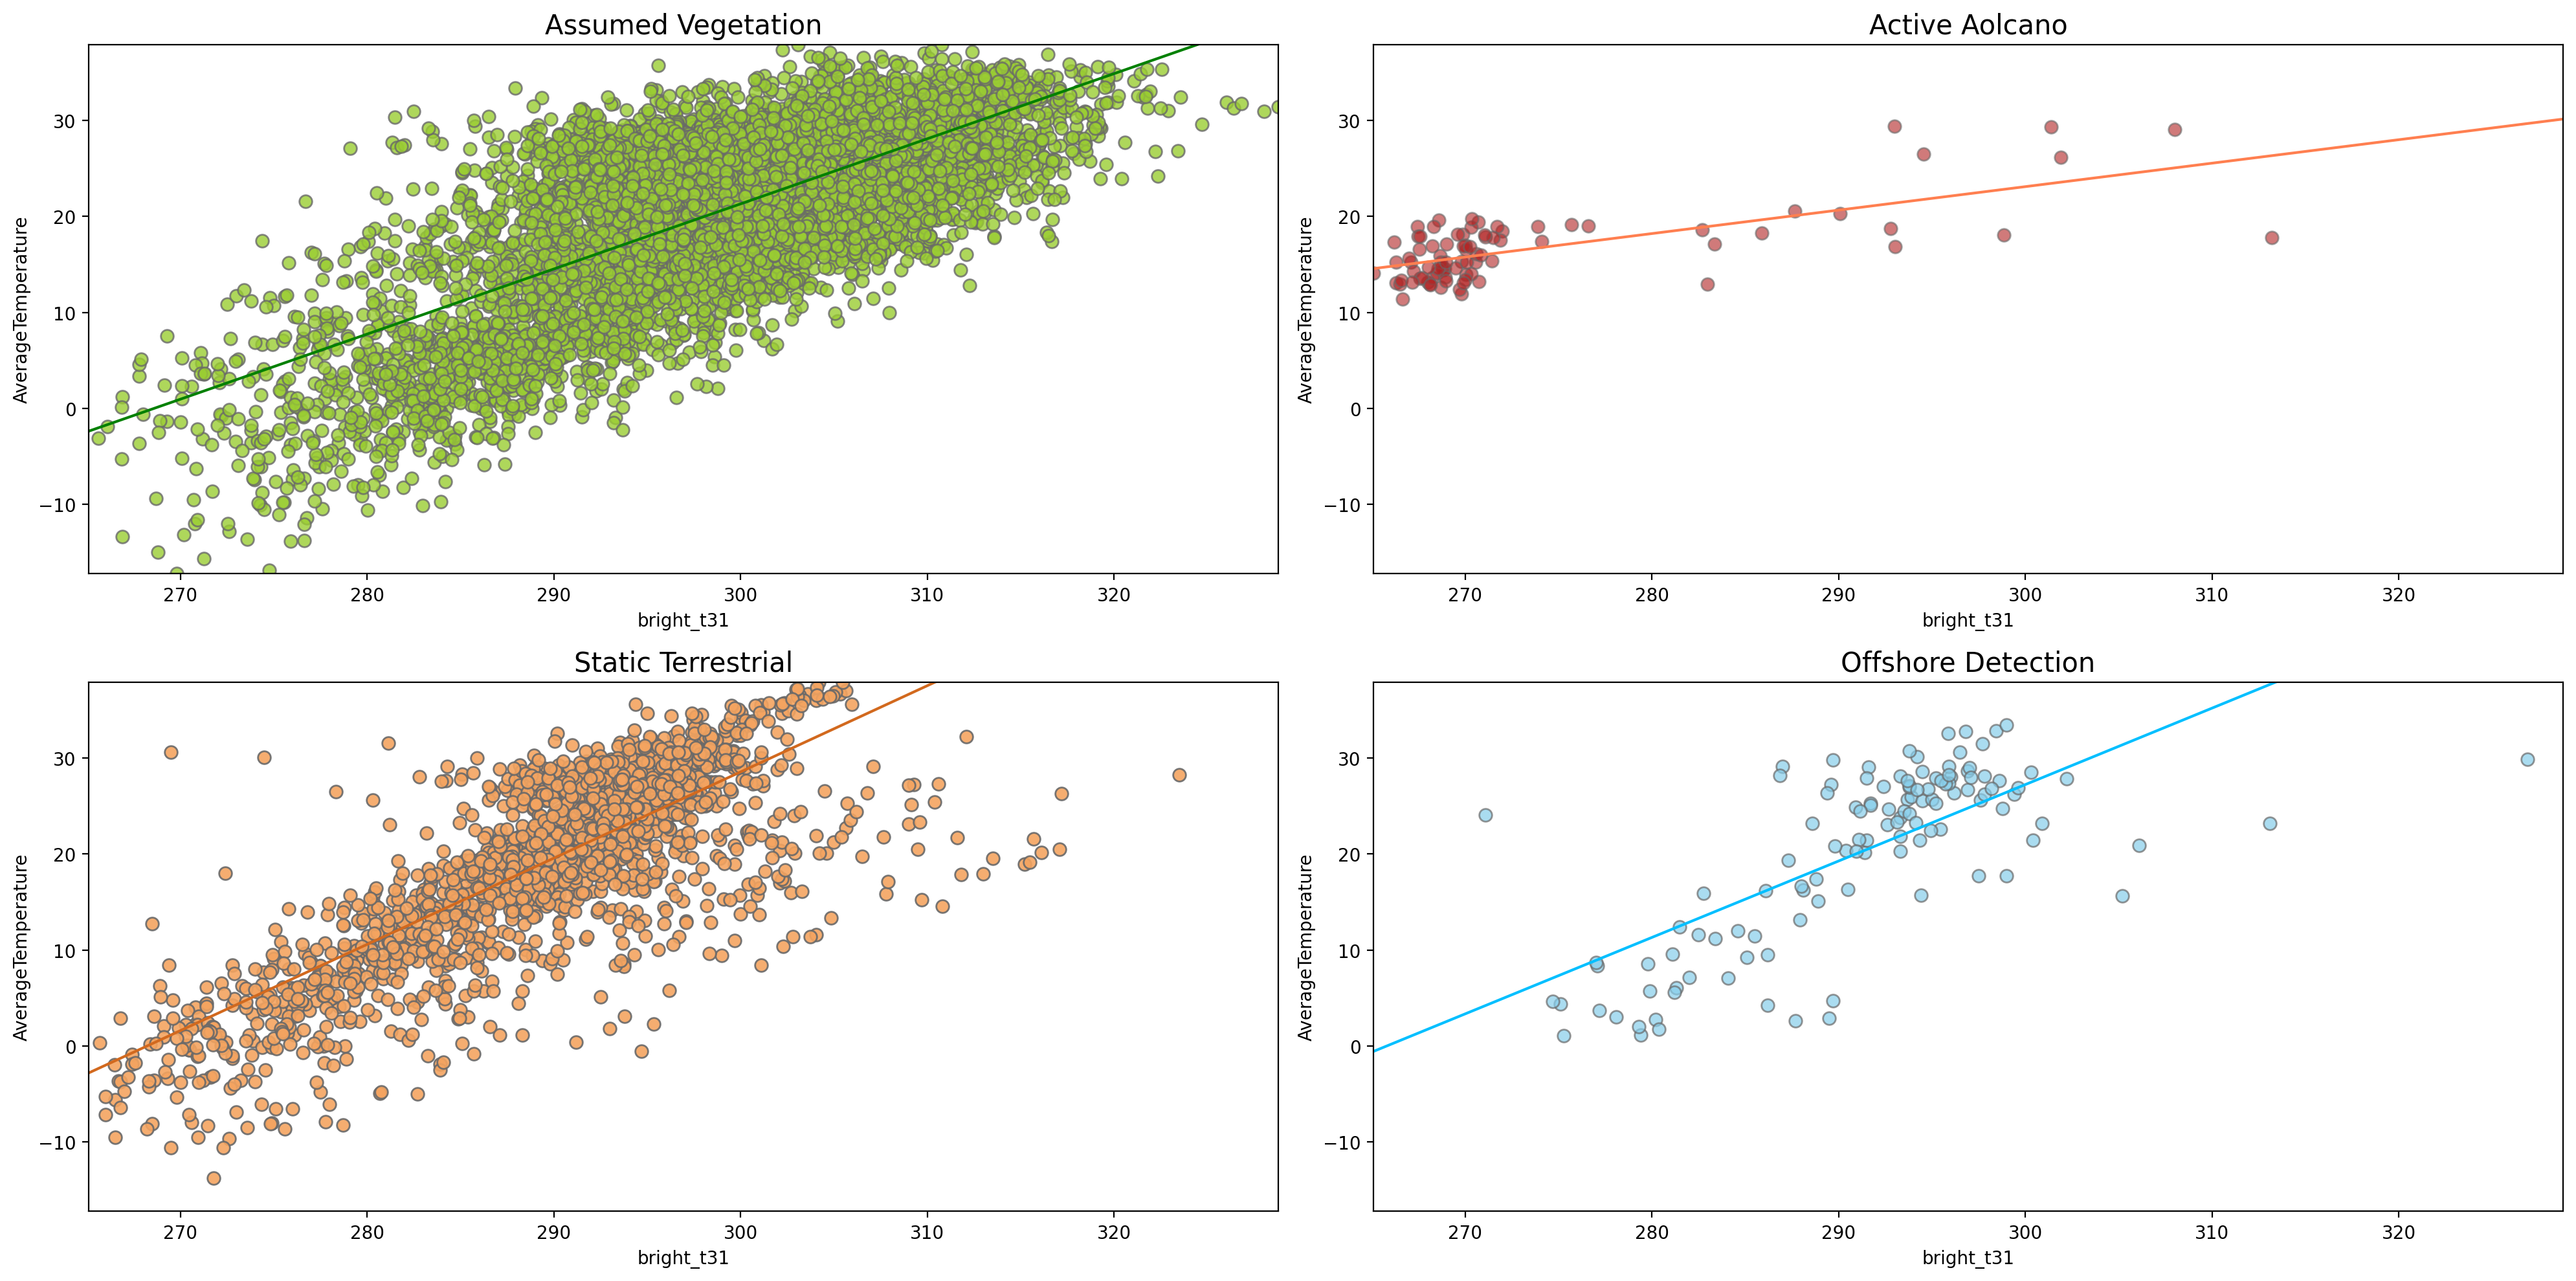

In [8]:
df_0 = df[df['type']==0][['AverageTemperature', 'bright_t31']]
df_1 = df[df['type']==1][['AverageTemperature', 'bright_t31']]
df_2 = df[df['type']==2][['AverageTemperature', 'bright_t31']]
df_3 = df[df['type']==3][['AverageTemperature', 'bright_t31']]


x_min = min([df_0['bright_t31'].min(), df_1['bright_t31'].min(), df_2['bright_t31'].min(), df_3['bright_t31'].min()])
x_max = max([df_0['bright_t31'].max(), df_1['bright_t31'].max(), df_2['bright_t31'].max(), df_3['bright_t31'].max()])
y_min = min([df_0['AverageTemperature'].min(), df_1['AverageTemperature'].min(), df_2['AverageTemperature'].min(), df_3['AverageTemperature'].min()])
y_max = max([df_0['AverageTemperature'].max(), df_1['AverageTemperature'].max(), df_2['AverageTemperature'].max(), df_3['AverageTemperature'].max()])

model_0 = LinearRegression()
model_0.fit(df_0[['bright_t31']], df_0['AverageTemperature'])
y_pred_0 = model_0.predict(np.linspace(x_min, x_max, 1000).reshape(-1, 1))
model_1 = LinearRegression()
model_1.fit(df_1[['bright_t31']], df_1['AverageTemperature'])
y_pred_1 = model_1.predict(np.linspace(x_min, x_max, 1000).reshape(-1, 1))
model_2 = LinearRegression()
model_2.fit(df_2[['bright_t31']], df_2['AverageTemperature'])
y_pred_2 = model_2.predict(np.linspace(x_min, x_max, 1000).reshape(-1, 1))
model_3 = LinearRegression()
model_3.fit(df_3[['bright_t31']], df_3['AverageTemperature'])
y_pred_3 = model_3.predict(np.linspace(x_min, x_max, 1000).reshape(-1, 1))

plt.figure(figsize=(20, 10), dpi=200)
plt.subplot(2, 2, 1)
plt.xlim([x_min, x_max])
plt.ylim([y_min, y_max])
plt.title('Assumed Vegetation', fontsize=15)
plt.scatter(df_0['bright_t31'], df_0['AverageTemperature'], color='yellowgreen', edgecolors='dimgray', alpha=0.8, s=50)
plt.plot(np.linspace(x_min, x_max, 1000).reshape(-1, 1), y_pred_0, color='green')
plt.xlabel('bright_t31')
plt.ylabel('AverageTemperature')

plt.subplot(2, 2, 2)
plt.xlim([x_min, x_max])
plt.ylim([y_min, y_max])
plt.title('Active Aolcano', fontsize=15)
plt.scatter(df_1['bright_t31'], df_1['AverageTemperature'], color='firebrick', edgecolors='dimgray', alpha=0.6, s=50)
plt.plot(np.linspace(x_min, x_max, 1000).reshape(-1, 1), y_pred_1, color='coral')
plt.xlabel('bright_t31')
plt.ylabel('AverageTemperature')

plt.subplot(2, 2, 3)
plt.xlim([x_min, x_max])
plt.ylim([y_min, y_max])
plt.title('Static Terrestrial', fontsize=15)
plt.scatter(df_2['bright_t31'], df_2['AverageTemperature'], color='sandybrown', edgecolors='dimgray', alpha=0.9, s=50)
plt.plot(np.linspace(x_min, x_max, 1000).reshape(-1, 1), y_pred_2, color='chocolate')
plt.xlabel('bright_t31')
plt.ylabel('AverageTemperature')

plt.subplot(2, 2, 4)
plt.xlim([x_min, x_max])
plt.ylim([y_min, y_max])
plt.title('Offshore Detection', fontsize=15)
plt.scatter(df_3['bright_t31'], df_3['AverageTemperature'], color='skyblue', edgecolors='dimgray', alpha=0.7, s=50)
plt.plot(np.linspace(x_min, x_max, 1000).reshape(-1, 1), y_pred_3, color='deepskyblue')
plt.xlabel('bright_t31')
plt.ylabel('AverageTemperature')
plt.tight_layout()
plt.savefig('../visualize/temperature_vs_fire.png')
plt.show()